<a href="https://colab.research.google.com/github/komal-kundu/coding-files/blob/main/heart_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data', 'drive', 'heart_data.csv', '.ipynb_checkpoints']


In [ ]:
data = pd.read_csv("heart_data.csv")
print('Shape of the data is ', data.shape)

In [7]:
data.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
data.dtypes

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [9]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')


In [10]:
dataset=pd.read_csv(r"heart_data.csv")
dataset

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [11]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

In [12]:
ab=[]
for x in dataset["age"]:
    x1=x/365
    x1=round(x1)
    ab.append(x1)

In [13]:
dataset.insert(2,"Age",ab)

In [14]:
a=dataset.iloc[:,[2,4,5,6,7,8,9,10,11,12,13,14]]
a

,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
# Working Data Imbalancing on Cardio Column
x=a.iloc[:,:-1].values
y=a.iloc[:,-1].values

In [16]:
from imblearn.over_sampling import SMOTE
s1=SMOTE()
x_data,y_data=s1.fit_resample(x,y)

In [17]:
from collections import Counter
print(Counter(y_data))

Counter({0: 35021, 1: 35021})


In [18]:
x_data

array([[5.00000000e+01, 2.00000000e+00, 1.68000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.50000000e+01, 1.00000000e+00, 1.56000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.20000000e+01, 1.00000000e+00, 1.65000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.20000000e+01, 1.00000000e+00, 1.60000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.18254922e+01, 1.00000000e+00, 1.44912746e+02, ...,
        8.72539017e-02, 0.00000000e+00, 8.72539017e-02],
       [5.28960211e+01, 1.72400527e+00, 1.66448011e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [19]:
y_data

array([0, 1, 1, ..., 1, 1, 1])

In [20]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20,random_state=1)

<Axes: >

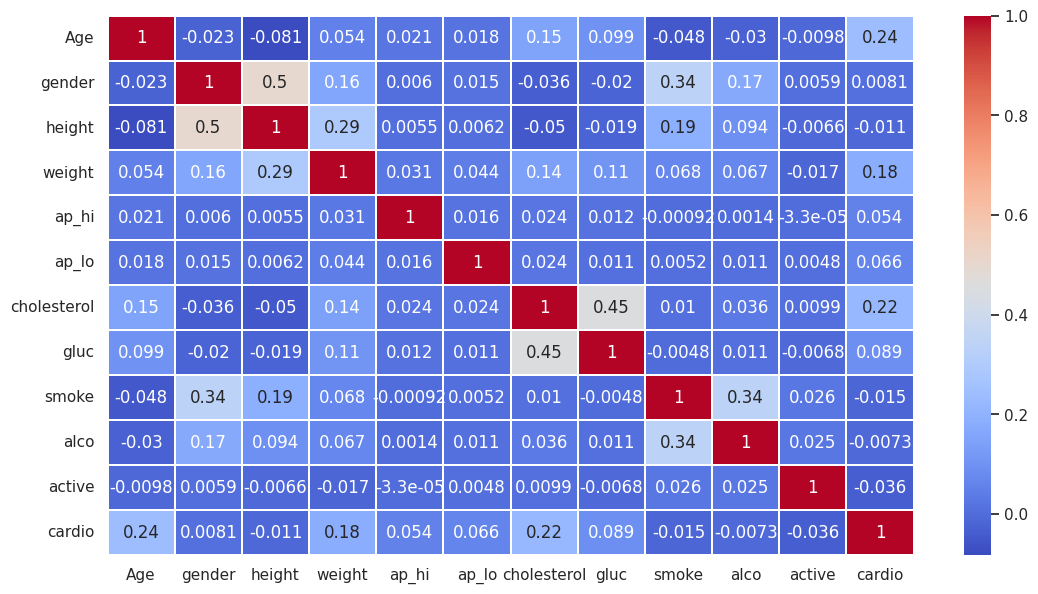

In [22]:
f, ax = plt.subplots(figsize=(13, 7))
dataplot = sns.heatmap(a.corr(), annot=True, cmap='coolwarm',linewidths=.1)
dataplot

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=l1.predict(x_test)
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
print("The accuracy score achieved using Logistic Regression is: "+str(ac)+" %")


The accuracy score achieved using Logistic Regression is: 71.38982082946677 %


In [26]:
from sklearn.svm import SVC
svm1=SVC()
svm1.fit(x_train,y_train)

svm_pred=svm1.predict(x_test)
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,svm_pred)*100
print("The accuracy score achieved using SVM is: "+str(ac1)+" %")

The accuracy score achieved using SVM is: 72.71040045684917 %


In [27]:
from sklearn.ensemble import RandomForestClassifier
r1=RandomForestClassifier()
r1.fit(x_train,y_train)

random_pred=r1.predict(x_test)
from sklearn.metrics import accuracy_score
ac2=accuracy_score(y_test,random_pred)*100
print("The accuracy score achieved using Random Forest is: "+str(ac2)+" %")

The accuracy score achieved using Random Forest is: 71.52544792633307 %


In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)
from sklearn.metrics import accuracy_score
ac3=accuracy_score(y_test,y_pred_nb)*100
print("The accuracy score achieved using Naive Bayes is: "+str(ac3)+" %")

The accuracy score achieved using Naive Bayes is: 61.19637375972589 %


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
from sklearn.metrics import accuracy_score
ac4=accuracy_score(y_test,y_pred_knn)*100
print("The accuracy score achieved using KNN is: "+str(ac4)+" %")

The accuracy score achieved using KNN is: 69.05560710971518 %


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
from sklearn.metrics import accuracy_score
ac5=accuracy_score(y_test,y_pred_dt)*100
print("The accuracy score achieved using Decision Tree is: "+str(ac5)+" %")

The accuracy score achieved using Decision Tree is: 60.97508744378614 %


In [31]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
abc.fit(x_train,y_train)

y_pred_abc = abc.predict(x_test)
from sklearn.metrics import accuracy_score
ac7=accuracy_score(y_test,y_pred_abc)*100
print("The accuracy score achieved using Ada Boost Classifier is: "+str(ac7)+" %")

The accuracy score achieved using Ada Boost Classifier is: 70.51895210222 %


In [32]:
from sklearn.ensemble import VotingClassifier
max_vote=VotingClassifier(estimators=[('Logistic Regression',l1),('Support Vector Machine',svm1),('Random Forest',r1),('Ada Boost',abc)])

In [33]:
max_vote.fit(x_train,y_train)
max_vote_y_pred=max_vote.predict(x_test)
from sklearn.metrics import accuracy_score
ac_max=accuracy_score(y_test,max_vote_y_pred)*100
print("The accuracy score achieved using Voting is: "+str(ac_max)+" %")

The accuracy score achieved using Voting is: 71.81811692483403 %


In [34]:
from sklearn.ensemble import BaggingClassifier
b1=BaggingClassifier(base_estimator=abc,n_estimators=10,random_state=11)
b1.fit(x_train,y_train)

BaggingClassifier(base_estimator=AdaBoostClassifier(learning_rate=1),
                  random_state=11)

In [35]:
y_bagg_pred=b1.predict(x_test)
from sklearn.metrics import accuracy_score
ac_bag=accuracy_score(y_test,y_bagg_pred)*100
print("The accuracy score achieved using Bagging is: "+str(ac_bag)+" %")

The accuracy score achieved using Bagging is: 71.52544792633307 %


In [36]:
from sklearn.ensemble import StackingClassifier
estimator_list = [('linear_regression',l1),
    ('ada_boost',abc),
    ('rf',r1),
    ('svm',svm1) ]

stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

stack_model.fit(x_train, y_train)

y_train_pred = stack_model.predict(x_train)
y_test_pred = stack_model.predict(x_test)

stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)

stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)

from sklearn.metrics import accuracy_score
ac_stack=accuracy_score(y_test,y_test_pred)*100
print("The accuracy score achieved using Stacking is: "+str(ac_stack)+" %")

The accuracy score achieved using Stacking is: 71.7752873152973 %


In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [38]:
kf=KFold(n_splits=5)
kf.get_n_splits(x)

5

In [39]:
scores=cross_val_score(l1,x_train,y_train,cv=kf)
print(scores)
print(np.mean(scores)*100)

[0.71562416 0.72017489 0.71687338 0.71925754 0.72461182]
71.93083585144231


In [40]:
for train_data,test_data in kf.split(x):
    x_train,x_test=x_data[train_data],x_data[test_data]
    y_train,y_test=y_data[train_data],y_data[test_data]

    scores=cross_val_score(l1,x_train,y_train,cv=kf)
    print(scores)
    ab=np.mean(scores)*100
    print(ab)
    print("Y data Counter: ",Counter(y_test))

[0.70875    0.70053571 0.70794643 0.71017857 0.70392857]
70.62678571428572
Y data Counter:  Counter({0: 7069, 1: 6931})
[0.696875   0.69857143 0.71       0.70991071 0.70383929]
70.38392857142858
Y data Counter:  Counter({0: 7016, 1: 6984})
[0.69589286 0.70330357 0.71214286 0.70910714 0.70151786]
70.43928571428572
Y data Counter:  Counter({1: 7049, 0: 6951})
[0.70589286 0.71696429 0.71776786 0.70794643 0.71125   ]
71.19642857142858
Y data Counter:  Counter({1: 7007, 0: 6993})
[0.69803571 0.70714286 0.7075     0.70125    0.716875  ]
70.61607142857143
Y data Counter:  Counter({1: 7008, 0: 6992})


In [41]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=21)
skf.get_n_splits(x_data,y_data)

5

In [42]:
for train_data,test_data in skf.split(x_data,y_data):
    x_train,x_test=x_data[train_data],x_data[test_data]
    y_train,y_test=y_data[train_data],y_data[test_data]

    scores=cross_val_score(l1,x_train,y_train,cv=skf)
#     y_pred=cross_val_predict(l1,x_test,y_test,cv=skf)
    print(scores)
    ab=np.mean(scores)*100
    print(ab)
    print("Checking y_test Balancing:",Counter(y_test))
#     print("Checking y_train Balancing:",Counter(y_train))

[0.70348889 0.70866423 0.70786116 0.71372479 0.71542031]
70.98318755260256
Checking y_test Balancing: Counter({0: 7005, 1: 7004})
[0.70277505 0.70447042 0.70259659 0.70953061 0.69953596]
70.37817268951814
Checking y_test Balancing: Counter({1: 7005, 0: 7004})
[0.71517801 0.70634425 0.70473811 0.69902739 0.70542566]
70.61426862793758
Checking y_test Balancing: Counter({1: 7004, 0: 7004})
[0.69554743 0.70286428 0.71018114 0.7023289  0.70462252]
70.31088537971561
Checking y_test Balancing: Counter({0: 7004, 1: 7004})
[0.70902115 0.70812885 0.70991345 0.71651646 0.71461717]
71.16394149579615
Checking y_test Balancing: Counter({0: 7004, 1: 7004})
